In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import scipy.optimize as optimize

In [3]:
from kinematics import FiveBarsMechanism
import numpy as np
import analysis

In [4]:
initial_guess = [30, 30, 60, 60, 15, 90]
bnds = ((20, 60), (20, 60), (30, 100), (30, 100), (10, 60), (30, 100))

pos = [40, 45, 90, 35]

def opti(params):
    params = np.insert(params, 0, pos, axis=0)
    
    finger = FiveBarsMechanism(list(params))
    angle_A_limits = [40, 180]
    angle_B_limits = [0, 90]
    init_sampling = 10
    area_sampling = 30

    r = analysis.estimate_reachable_area(finger, angle_A_limits, angle_B_limits, init_sampling, area_sampling)
    #return 1/r['biggest_rectangle']['y_length']
    
    #x_sampling = np.linspace(r['biggest_rectangle']['x_min'], r['biggest_rectangle']['x_max'], area_sampling)
    #y_sampling = np.linspace(r['biggest_rectangle']['y_min'], r['biggest_rectangle']['y_max'], area_sampling)
    
    delta = 1

    #pos_error = analysis.estimate_precision(finger, x_sampling, y_sampling, delta, angle_A_limits, angle_B_limits)
    
    #print(params, r['biggest_rectangle']['surface'], pos_error.mean())
    
    #print(1/r['biggest_rectangle']['surface'] * pos_error.max()**2)
    #x_err = np.abs(r['biggest_rectangle']['x_length'] - 50)
    y_err = np.abs(r['biggest_rectangle']['y_length'] - 50)
    
    #err1 = 1/r['biggest_rectangle']['surface']
    err2 = y_err #+ pos_error.max()
    #err2 = err2**2 if err2>1 else err2
    #err3 = r['reachable_surface']/r['biggest_rectangle']['surface'] - 1
    
    #err4 = np.exp(36-r['biggest_rectangle']['x_length']) + np.exp(26-r['biggest_rectangle']['y_length'])
   
    print( err2)
    
    return err2

In [5]:
result = optimize.minimize(opti, initial_guess, bounds=bnds)

23.586301689519104
23.586301681901773
23.586301681927637
23.586301692804355
23.58630169291949
23.58630169128506
23.58630169015636
16.10002083345664
16.100020823156157
16.100020823153272
16.1000208384299
16.100020838571652
16.100020835663813
16.1000208342884
21.75438781332214
21.75438780342745
21.754387803395247
21.754387819054173
21.7543878191687
21.754387815072192
21.75438781403713
15.94603344879333
15.946033438389122
15.946033438383992
15.946033453864246
15.946033454006567
15.946033451005377
15.946033449630207
15.806707135954113
15.80670712545384
15.80670712544675
15.806707141115552
15.8067071412583
15.806707138170466
15.806707136795637
22.865590823614895
22.865590814820294
22.865590814801465
22.865590828288575
22.8655908284007
22.86559082533813
22.86559082429163
15.775424782447175
15.775424771925103
15.775424771917528
15.775424787629248
15.77542478777211
15.775424784664509
15.775424783289736
15.745605882611116
15.745605872068083
15.745605872060096
15.7456058878129
15.745605887955875

3.5222814957297857
3.522281486263566
3.5222814853946574
3.5220421123860888
3.5220421107875666
3.5220420977222346
3.5220421208321113
3.5220421243624997
3.5220421148957826
3.522042114026874
3.4946162142575616
3.494616212656865
3.494616199551942
3.4946162227540043
3.494616226287235
3.4946162167654222
3.4946162158994127
3.49455657406412
3.4945565724634093
3.494556559358358
3.4945565825606764
3.4945565860938927
3.4945565765719664
3.494556575705971
3.494497191710991
3.494497190110266
3.494497177005087
3.4944972002076753
3.494497203740906
3.494497194218809
3.494497193352842
3.480803918002806
3.4808039164009443
3.4808039032758415
3.4808039265247857
3.480803930059423
3.4808039205097003
3.480803919645183
3.4807890970188993
3.48078909541708
3.480789082292006
3.4807891055409073
3.480789109075573
3.4807890995257935
3.480789098661276
5.586667432384985
5.586667430855286
5.586667418314221
5.586667440535692
5.586667443910557
5.586667434777368
5.586667433953053
3.480782656900388
3.480782655298583
3.4807

In [7]:
result

      fun: 3.472349778820373
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.16025011, -1.47397531,  0.85375113,  1.2073058 ,  0.2506354 ,
        0.1642719 ])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 756
      nit: 6
     njev: 108
   status: 2
  success: False
        x: array([54.32971507, 54.37960796, 47.47256923, 47.1032613 , 10.0479389 ,
       88.05668422])

In [8]:
#optim 60X60 => [40. 45. 90. 35. 59. 56. 74. 73. 12. 85.]

In [9]:
params = list(np.insert(result.x, 0, pos, axis=0))
finger = FiveBarsMechanism(params)
angle_A_limits = [40, 180]
angle_B_limits = [0, 90]
init_sampling = 10
area_sampling = 100
r = analysis.estimate_reachable_area(finger, angle_A_limits, angle_B_limits, init_sampling, area_sampling)
print('parameters:', np.round(params))

parameters: [40. 45. 90. 35. 54. 54. 47. 47. 10. 88.]


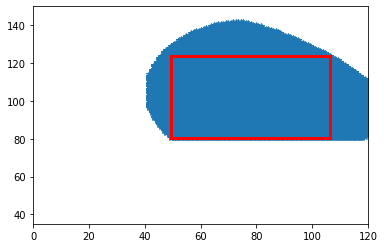

56.87287671353198 43.36589982545213


In [10]:
analysis.plot_reachable_area(r)
print(r['biggest_rectangle']['x_length'], r['biggest_rectangle']['y_length'])

In [11]:
r['biggest_rectangle']

{'x_min': 49.531552594279745,
 'y_min': 80.53194028472173,
 'x_max': 106.40442930781172,
 'y_max': 123.89784011017386,
 'x_length': 56.87287671353198,
 'y_length': 43.36589982545213,
 'surface': 2466.343474344317}

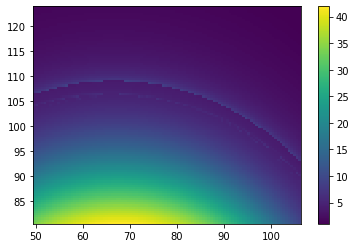

In [12]:
#sample biggest_rectangle
area_sampling = 100

x_sampling = np.linspace(r['biggest_rectangle']['x_min'], r['biggest_rectangle']['x_max'], area_sampling)
y_sampling = np.linspace(r['biggest_rectangle']['y_min'], r['biggest_rectangle']['y_max'], area_sampling)

#x_sampling = r['x']
#y_sampling = r['y']
delta = 1

pos_error = analysis.estimate_precision(finger, x_sampling, y_sampling, delta, angle_A_limits, angle_B_limits)

plt.imshow(pos_error.T, aspect='auto', 
           origin='lower', 
           extent=[min(x_sampling),max(x_sampling),min(y_sampling),max(y_sampling)], 
           interpolation='nearest')
plt.colorbar()
plt.show()

In [13]:
pos_error.mean()

10.141827077093255